In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./loan_train.csv",index_col = 0)
data_test = pd.read_csv("./loan_test.csv")

In [3]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
data.info()

## there are many object type variables
## and also many null values

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [14]:
data.describe(include='all')

## see for the variables of non-object type:
## there is a huge difference between the mean value and the max value
## clearly indicating the presence of outliers in the dataset


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [15]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [7]:
## since only two values
## so lets convert it to object data type

data['Credit_History'] = data['Credit_History'].astype('O')


In [8]:
## lets visualize all the object type of columns in the data
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002335,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [9]:
data.drop("Loan_ID",axis=1,inplace=True)

In [10]:
## lets see if we have got any duplicate rows in the dataset

data.duplicated().any()

## since False, hence no duplicated rows

False

Loan approved %  68.72964169381108
Loan denied %  31.270358306188925


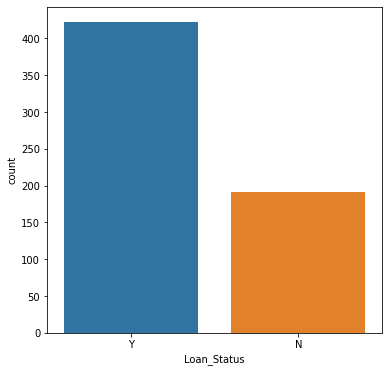

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.countplot(data['Loan_Status'])


## percentage of yes and no in loan status

loan_yes = len(data[data['Loan_Status']=='Y']) / len(data['Loan_Status'])
loan_no = 100 - loan_yes*100

print("Loan approved % ",loan_yes*100)
print("Loan denied % ",loan_no)

In [14]:
data.select_dtypes(include='O').head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [12]:
## lets see how many got loan with respect to credit history

data.describe(include='O').columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

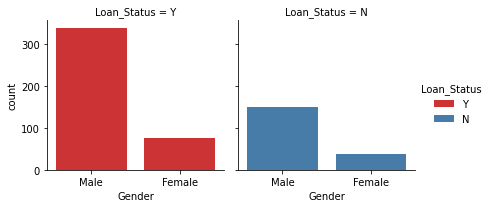

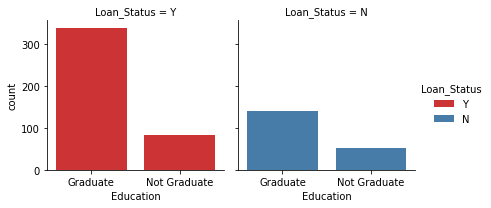

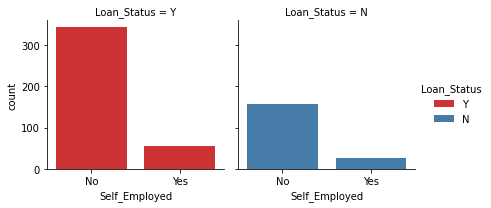

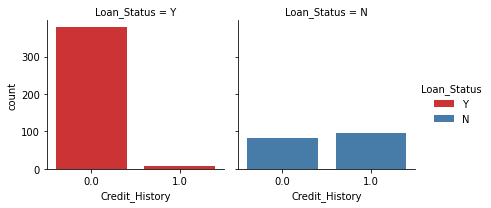

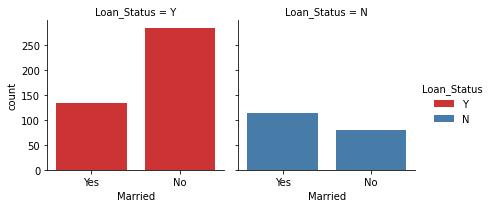

In [15]:
object_cols= ['Gender',  'Education', 'Self_Employed',
       'Credit_History','Married']

for i in object_cols:
    graph = sns.FacetGrid(data,col='Loan_Status',hue='Loan_Status',palette='Set1')
    graph.map(sns.countplot,i).add_legend()


<AxesSubplot:xlabel='Dependents', ylabel='count'>

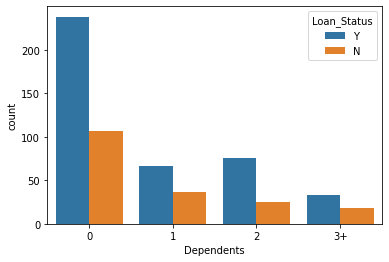

In [288]:
sns.countplot(x='Dependents',hue='Loan_Status',data=data,)


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

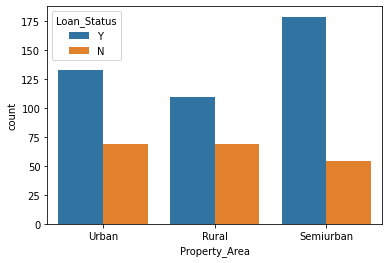

In [289]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=data,)

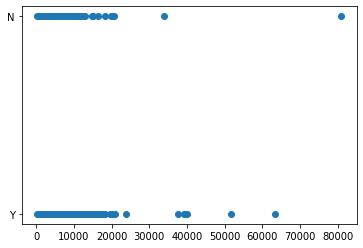

In [290]:
## applicant Income

plt.scatter(data['ApplicantIncome'],data['Loan_Status'])

## no pattern can be established

In [291]:
## we will see loan_status based on each features

data.groupby('Loan_Status').median()

## see the CoapplicantIncome: if its less, the loan status is NO

## so, CoapplicantIncome is the best feature

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [292]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [293]:
## so null values are there in the data, some in object type variables and also in the int tyype

## so lets bifurcate the categorical and int columns

cat_data = []
num_data =[]

for i,c in enumerate(data.dtypes):
    if c=='object':
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])



In [294]:
cat_data = pd.DataFrame(cat_data)
num_data = pd.DataFrame(num_data)

cat_data.head()


,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Male,Male,Male,Female,Male,Male,Male,Female
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0,2,0,3+,2,1,...,1,0,1,2,0,0,3+,1,2,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,...,Graduate,Not Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes


In [295]:
## cols and rows are exchanged
## so lets transpose the DataFrame

cat_data = cat_data.transpose()
num_data = num_data.transpose()

cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [296]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [297]:
cat_data.isnull().sum().sort_values(ascending=False)

Credit_History    50
Self_Employed     32
Dependents        15
Gender            13
Married            3
Loan_Status        0
Property_Area      0
Education          0
dtype: int64

In [298]:
cat_data['Credit_History'].value_counts()

## 1 repeated max times

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [299]:
## lets fill the null values in the cat_dataset with most frequent value occured in that particualr column

cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [300]:
cat_data.info()
## credit history got converted to int type

cat_data['Credit_History'] = cat_data['Credit_History'].astype('O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          614 non-null    object 
 1   Married         614 non-null    object 
 2   Dependents      614 non-null    object 
 3   Education       614 non-null    object 
 4   Self_Employed   614 non-null    object 
 5   Credit_History  614 non-null    float64
 6   Property_Area   614 non-null    object 
 7   Loan_Status     614 non-null    object 
dtypes: float64(1), object(7)
memory usage: 38.5+ KB


In [301]:
num_data.isnull().sum().sort_values(ascending=False)

LoanAmount           22
Loan_Amount_Term     14
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64

In [302]:
num_data.describe()

## since there are outliers in the num_dataset, so using the mean value won't be a good idea
## so lets replace the null values using bfill method

num_data = num_data.apply(lambda x: x.fillna(method='bfill'))

print(num_data.isna().sum())


ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64


In [303]:
## lets convert the categorical columns 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [304]:
target_values ={'Y':0,'N':1}
target = cat_data.Loan_Status

target = target.map(target_values)
cat_data.drop("Loan_Status",axis=1,inplace=True)

In [305]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          614 non-null    object
 1   Married         614 non-null    object
 2   Dependents      614 non-null    object
 3   Education       614 non-null    object
 4   Self_Employed   614 non-null    object
 5   Credit_History  614 non-null    object
 6   Property_Area   614 non-null    object
dtypes: object(7)
memory usage: 33.7+ KB


In [306]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [307]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [308]:
df = pd.concat([cat_data,num_data,target],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


## Training the data

In [309]:
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)



In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models ={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5,random_state=42)
}

In [311]:
from sklearn.metrics import precision_score, recall_score,f1_score, log_loss, accuracy_score

def loss(y_true,y_pred,retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)

    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [312]:
def train_eval_train(models,X,y):
    for name,model in models.items():
        print(name,":")
        model.fit(X,y)
        loss(y,model.predict(X))
        print("*"*50)


## for now, we are fitting and predicting on the training dataset only
train_eval_train(models,X_train,y_train)

LogisticRegression :
  pre: 0.910
  rec: 0.442
  f1: 0.595
  loss: 6.232
  acc: 0.820
**************************************************
KNeighborsClassifier :
  pre: 0.649
  rec: 0.348
  f1: 0.453
  loss: 8.710
  acc: 0.748
**************************************************
SVC :
  pre: 1.000
  rec: 0.014
  f1: 0.029
  loss: 10.211
  acc: 0.704
**************************************************
DecisionTreeClassifier :
  pre: 0.942
  rec: 0.587
  f1: 0.723
  loss: 4.655
  acc: 0.865
**************************************************


In [313]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)


def train_eval_cross(models,X,y,folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    idx = [' pre', ' rec',' f1',' loss', ' acc']

    for name,model in models.items():
        ls=[]
        print(name,":")

        for train,test in folds.split(X,y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test],y_pred,retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0),index=idx)[0])
        print("*"*30)    




In [314]:

train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre     0.891111
 rec     0.441758
 f1      0.583362
 loss    6.382179
 acc     0.815217
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre      0.401627
 rec      0.202747
 f1       0.266081
 loss    11.187628
 acc      0.676087
Name: 0, dtype: float64
******************************
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.436719
 acc      0.697826
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.769066
 rec     0.456044
 f1      0.560981
 loss    7.133043
 acc     0.793478
Name: 0, dtype: float64
******************************


## Feature Engineering

<AxesSubplot:>

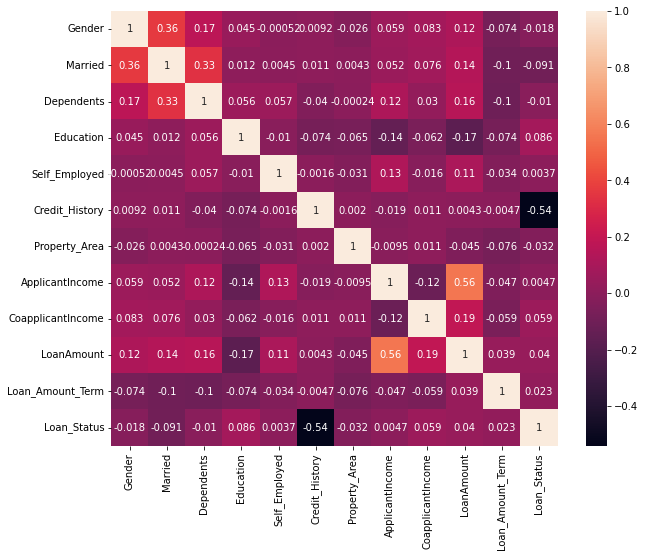

In [315]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot=True,)

In [316]:
## lets use the feature engineering 

df['newcol1'] = df['CoapplicantIncome'] / df['ApplicantIncome']
df['newcol2'] = df['Loan_Amount_Term'] * df['LoanAmount']


<AxesSubplot:>

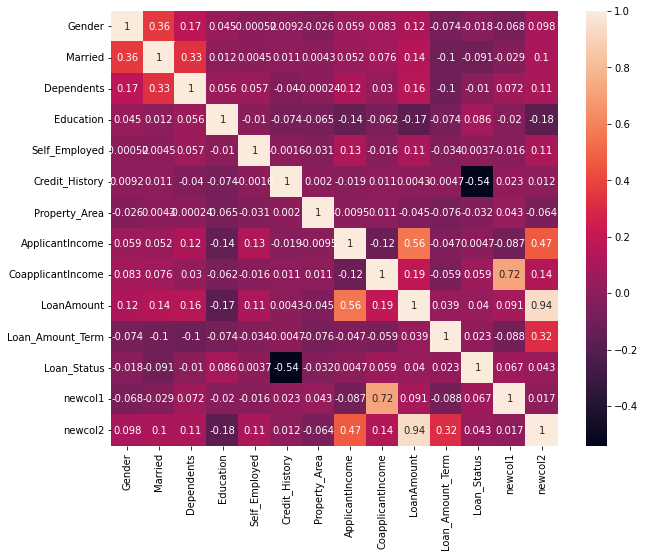

In [317]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [318]:
df.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [319]:
from sklearn.model_selection import train_test_split

X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

train_eval_train(models,X_train,y_train)

LogisticRegression :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.362
  acc: 0.700
**************************************************
KNeighborsClassifier :
  pre: 0.656
  rec: 0.290
  f1: 0.402
  loss: 8.935
  acc: 0.741
**************************************************
SVC :
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 10.362
  acc: 0.700
**************************************************
DecisionTreeClassifier :
  pre: 0.912
  rec: 0.529
  f1: 0.670
  loss: 5.406
  acc: 0.843
**************************************************


In [320]:
train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.361633
 acc      0.700000
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre      0.226111
 rec      0.110440
 f1       0.141082
 loss    12.764412
 acc      0.630435
Name: 0, dtype: float64
******************************
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.361633
 acc      0.700000
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.828214
 rec     0.441758
 f1      0.570213
 loss    6.832695
 acc     0.802174
Name: 0, dtype: float64
******************************


In [321]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*80)

1    502
0    112
Name: Gender, dtype: int64
********************************************************************************
1    401
0    213
Name: Married, dtype: int64
********************************************************************************
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
********************************************************************************
0    480
1    134
Name: Education, dtype: int64
********************************************************************************
0    532
1     82
Name: Self_Employed, dtype: int64
********************************************************************************
1    525
0     89
Name: Credit_History, dtype: int64
********************************************************************************
1    233
2    202
0    179
Name: Property_Area, dtype: int64
********************************************************************************
0    422
1    192
Name: Loan_Status, dtype: int64
***********

Text(0.5, 1.0, 'After log')

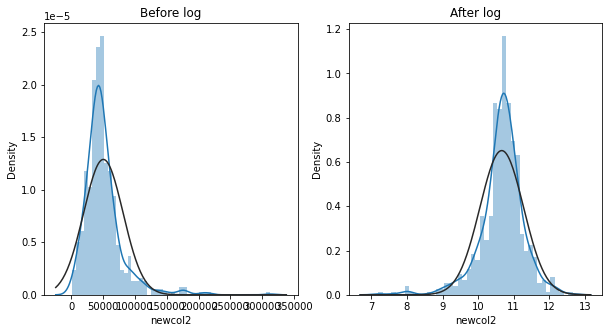

In [322]:
from scipy.stats import norm

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['newcol2'],fit=norm,ax=ax[0]).set_title('Before log')
## the graph is right skewed

df['newcol2'] = np.log(df['newcol2'])

sns.distplot(df['newcol2'],fit=norm,ax=ax[1]).set_title('After log')




In [323]:

X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre     0.924444
 rec     0.441758
 f1      0.587807
 loss    6.232007
 acc     0.819565
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre     0.716111
 rec     0.369780
 f1      0.479834
 loss    8.259313
 acc     0.760870
Name: 0, dtype: float64
******************************
SVC :
 pre     0.721667
 rec     0.205495
 f1      0.303302
 loss    8.634703
 acc     0.750000
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.831548
 rec     0.449451
 f1      0.576537
 loss    6.757611
 acc     0.804348
Name: 0, dtype: float64
******************************


In [324]:
df['newcol1'].value_counts()
## lets change its values:  >0.5 as 1 else 0

0.000000    273
0.565659      2
0.735294      2
0.826560      1
1.151736      1
           ... 
1.240168      1
1.006638      1
0.585556      1
0.430945      1
0.197589      1
Name: newcol1, Length: 340, dtype: int64

In [325]:
df['newcol1'] = [0 if x<0.5 else 1 for x in df['newcol1']]

df['newcol1'].value_counts()

0    374
1    240
Name: newcol1, dtype: int64

In [326]:

X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre     0.934167
 rec     0.441758
 f1      0.590573
 loss    6.156921
 acc     0.821739
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre     0.728333
 rec     0.341209
 f1      0.453200
 loss    8.259306
 acc     0.760870
Name: 0, dtype: float64
******************************
SVC :
 pre     0.626667
 rec     0.213187
 f1      0.309344
 loss    8.559618
 acc     0.752174
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.825462
 rec     0.464286
 f1      0.584187
 loss    6.682528
 acc     0.806522
Name: 0, dtype: float64
******************************


In [327]:
df.head()
## only col2 has some float values

## lets look for outliers in newcol2

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,newcol1,newcol2
0,1,0,0,0,0,1,2,0,0,10.738134
1,1,1,1,0,0,1,0,1,0,10.738134
2,1,1,0,0,1,1,2,0,0,10.075759
3,1,1,0,1,0,1,2,0,1,10.673596
4,1,0,0,0,0,1,2,0,0,10.834864


Text(0.5, 1.0, 'Outliers in Col2')

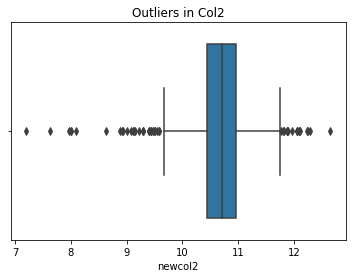

In [328]:
sns.boxplot(df['newcol2'])
plt.title("Outliers in Col2")

In [329]:
threshold=1.5
## this value works best, go and play with this value and see which value suits the best value
## don't choose too small value, else you may loose some valuable info

new_col_2_out = df['newcol2']
q25,q75 = np.percentile(new_col_2_out,25), np.percentile(new_col_2_out,75)
print('Quartile 25:{},\nQuartile 75:{}'.format(q25,q75) )

iqr = q75-q25
print('iqr:{}'.format(iqr))

cut = iqr*threshold
lower,upper = q25-cut, q75+cut
print('cut:{}'.format(cut))
print('lower:{}'.format(lower))
print('upper:{}'.format(upper))

outliers=[x for x in new_col_2_out if x<lower or x>upper]
print('Number of outliers:{}'.format(len(outliers)))


df_Outliers = df.copy()

df_Outliers = df_Outliers.drop(df_Outliers[(df_Outliers['newcol2']>upper) | (df_Outliers['newcol2']<lower)].index)



Quartile 25:10.439980923050696,
Quartile 75:10.967508396434619
iqr:0.5275274733839233
cut:0.7912912100758849
lower:9.64868971297481
upper:11.758799606510504
Number of outliers:49


<AxesSubplot:xlabel='newcol2'>

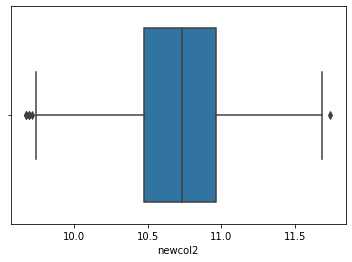

In [330]:
sns.boxplot(df_Outliers['newcol2'])

In [331]:
df=df_Outliers

In [332]:

X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre     0.923214
 rec     0.456410
 f1      0.601133
 loss    6.116012
 acc     0.822924
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre     0.751429
 rec     0.372436
 f1      0.487407
 loss    7.827670
 acc     0.773367
Name: 0, dtype: float64
******************************
SVC :
 pre      0.266667
 rec      0.056410
 f1       0.085397
 loss    10.128318
 acc      0.706755
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.812042
 rec     0.464103
 f1      0.569019
 loss    7.012972
 acc     0.796955
Name: 0, dtype: float64
******************************


<AxesSubplot:>

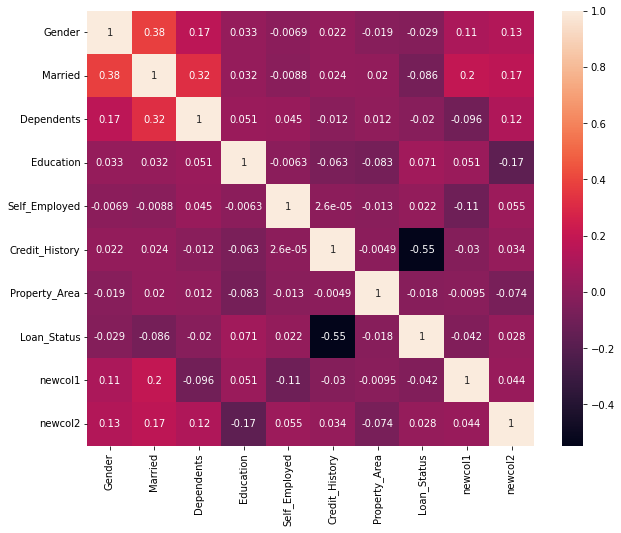

In [333]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot=True)

In [334]:
df.drop(['Married','Self_Employed'],axis=1,inplace=True)
X = df.drop("Loan_Status",axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


train_eval_cross(models,X_train,y_train,skf)

LogisticRegression :
 pre     0.923214
 rec     0.456410
 f1      0.601133
 loss    6.116012
 acc     0.822924
Name: 0, dtype: float64
******************************
KNeighborsClassifier :
 pre     0.735498
 rec     0.410256
 f1      0.512907
 loss    7.999804
 acc     0.768383
Name: 0, dtype: float64
******************************
SVC :
 pre     0.835714
 rec     0.310256
 f1      0.443633
 loss    7.596243
 acc     0.780066
Name: 0, dtype: float64
******************************
DecisionTreeClassifier :
 pre     0.775962
 rec     0.456410
 f1      0.558937
 loss    7.255856
 acc     0.789922
Name: 0, dtype: float64
******************************
